In [1]:
import pandas as pd
import numpy as np
import utility_01

In [2]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


In [4]:
df=pd.read_json('dfObs_v01.json');
df=df.sort_index();
len(df)
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [5]:
df.head()

,sents,chapter,entities,chunks,label
0,Chapter 1,1.0,[],[Chapter],0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1.0,[],"[the distinction, the first motion, the second or proper motions, the proper motions, the second inequality]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1.0,[],"[The testimony, the ages, the motions, the planets]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1.0,[],"[Reason, experience, their gyrations, perfect circles]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1.0,[],"[figures, it, circles, bodies, the heavens]",0


In [6]:
df.tail()

,sents,chapter,entities,chunks,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"[('Mars', 'PLAN'), ('opposition', 'ASTR'), ('Mars', 'PLAN'), ('Earth', 'PLAN'), ('Sun', 'PLAN'), ('17 hours 20 minutes', 'TIME'), ('Mars', 'PLAN'), ('eastward', 'ASTR'), ('Sun', 'PLAN')]","[the position, Mars, opposition, Kepler, the angular distance, Mars, Earth, the place, 17 hours, Mars]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"[('longitude', 'ASTR'), ('Mars', 'PLAN'), ('opposition', 'ASTR'), ('198° 37\' 50""', 'LONG'), ('Mars', 'PLAN'), ('orbit', 'ASTR'), ('198° 37\' 10""', 'LONG'), ('18° 37\' 10"" Libra', 'LONG')]","[Kepler, the longitude, Mars, opposition, 198°, he, order, Mars's orbit, he, 198°, ' 10"" Libra]",1
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"[('Sun', 'PLAN'), ('longitude', 'ASTR'), ('observation', 'ASTR'), ('Mars', 'PLAN')]","[The Sun, its longitude, the time, observation, its position, Mars]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"[('opposition', 'ASTR'), ('17 hours 20 minutes', 'TIME'), ('March 29', 'DATE'), ('observation', 'ASTR')]","[the time, opposition, 17 hours, March, the time, the observation]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"[('opposition', 'ASTR'), ('March 28', 'DATE'), ('4h 23m', 'TIME')]","[Kepler, the time, opposition, March, 23m AM, old style]",1


In [7]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier

In [8]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', XGBClassifier())])


In [9]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [10]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

In [11]:
trial_02.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabular...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing

In [12]:
y_pred=trial_02.predict(X_test)

In [13]:
from utility_01 import *

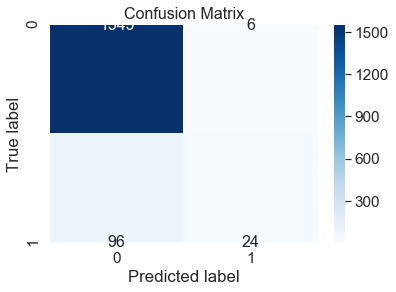

In [14]:
Color_Confusion_Matrix(y, y_test, y_pred)